In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\D\Desktop\Admission_Predict_Ver1.1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['Serial No.'],inplace=True)

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [17]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,1.5,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)


In [22]:
x_train

array([[0.4893617 , 0.37037037, 0.25      , ..., 0.875     , 0.62179487,
        0.        ],
       [0.29787234, 0.44444444, 0.25      , ..., 0.875     , 0.42307692,
        1.        ],
       [0.65957447, 0.7037037 , 0.75      , ..., 0.375     , 0.41666667,
        1.        ],
       ...,
       [0.14893617, 0.07407407, 0.25      , ..., 0.125     , 0.45512821,
        1.        ],
       [0.44680851, 0.44444444, 0.5       , ..., 0.375     , 0.48076923,
        0.        ],
       [0.        , 0.14814815, 0.25      , ..., 0.75      , 0.32051282,
        1.        ]])

In [62]:
tf.random.set_seed(42)
m=tf.keras.Sequential([tf.keras.layers.Dense(7,activation="relu"),tf.keras.layers.Dense(7,activation="relu"),tf.keras.layers.Dense(1,activation="linear")])
m.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam())
history=m.fit(x_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 18ms/step - loss: 0.6473 - val_loss: 0.6313
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6211 - val_loss: 0.6040
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5925 - val_loss: 0.5741
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5610 - val_loss: 0.5409
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.5262 - val_loss: 0.5039
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4872 - val_loss: 0.4623
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4439 - val_loss: 0.4152
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3946 - val_loss: 0.3617
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3389 - val_loss: 0.3007
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 0.2754 - val_loss: 0.2316
Epoch 11

In [50]:
y_pred=m.predict(x_test)


4/4 [==============================] - 0s 1ms/step


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7757637087314284

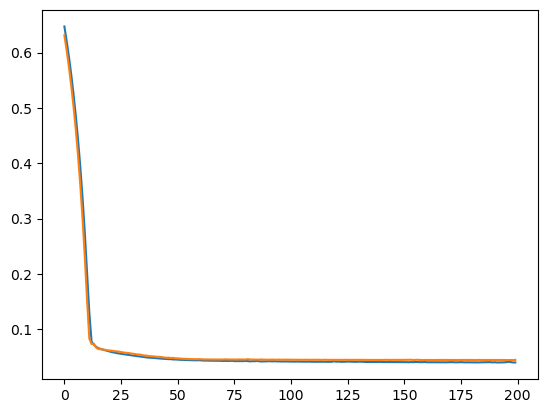

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [74]:
m.predict([[487,158,4,4.5,4.5,9.65,1]])


1/1 [==============================] - 0s 44ms/step


array([[86.72278]], dtype=float32)